# Reconstruction and prediction tasks

An example of reconstruction task using `Asso` with `NoSplit` on `MovieLensData`.

An example of prediction task using `Asso` with `RatioSplit` on `MovieLensData`.

In [1]:
# use project files rather than the installed PyBMF

%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

c:\Users\nieht\Anaconda3\envs\pybmf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : 2
[I] seed         : 1000
[I] noise        : 2
[I] seed         : 2000
[I] Using RandomState.


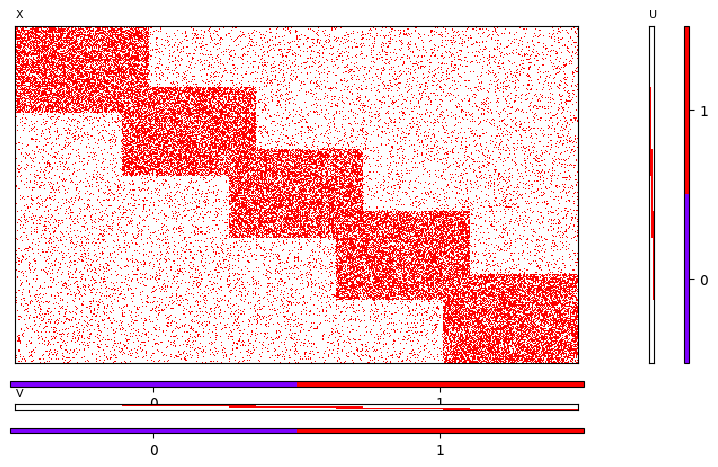

<Figure size 640x480 with 0 Axes>

In [2]:
# generating synthetic data

from PyBMF.generators import BlockDiagonalMatrixGenerator

data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.3, 0.2])
data.generate(seed=1000)
data.add_noise(noise=[0.4, 0.1], seed=2000)

data.show_matrix(scaling=0.5)

[I] Found settings.ini at d:\MEGA\PyBMF\examples\settings.ini
[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


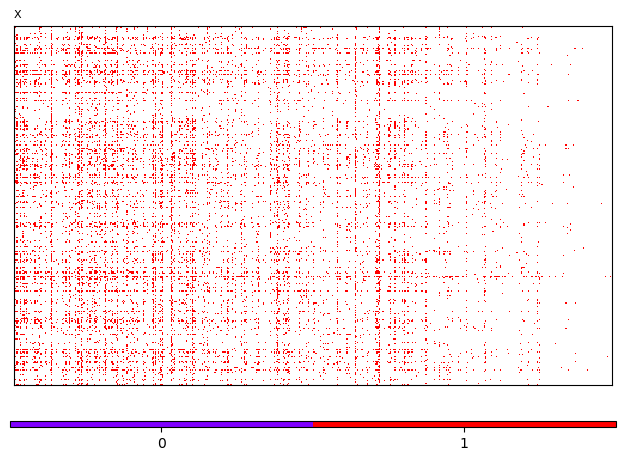

<Figure size 640x480 with 0 Axes>

In [3]:
# loading real-world data

from PyBMF.datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

data.show_matrix(scaling=0.5)

# Reconstruction task with `NoSplit`

In [4]:
# splitting the data into train, validation and test

from PyBMF.datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split = NoSplit(X=data.X)

# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1721986416
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1721986416


[I] tau          : 0.15
[I] k            : 5
[I] tol          : 0
[I] w_fp         : 0.2
[I] w_fn         : None
[I] verbose      : False
[I] display      : False
[I] save_model   : False
[I] task         : reconstruction
[I]   save_model : False
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-07-26 17-33-36-373793 Asso


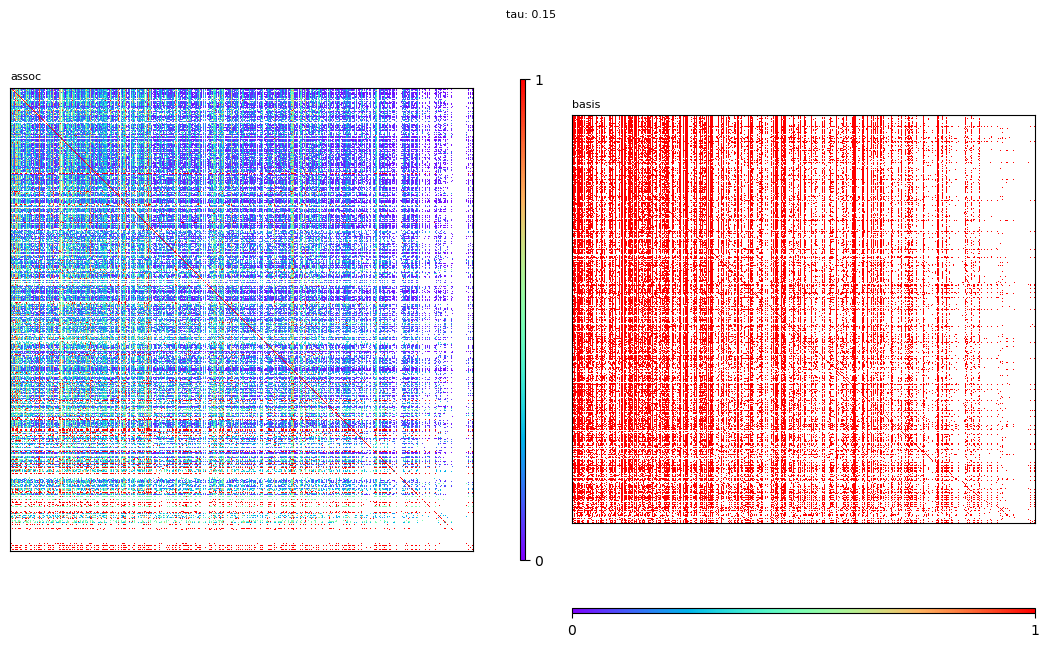

100%|██████████| 5/5 [00:10<00:00,  2.13s/it]                

[W] Stopped in advance: Reach requested factor
[I] time elapsed :  11s


<Figure size 640x480 with 0 Axes>

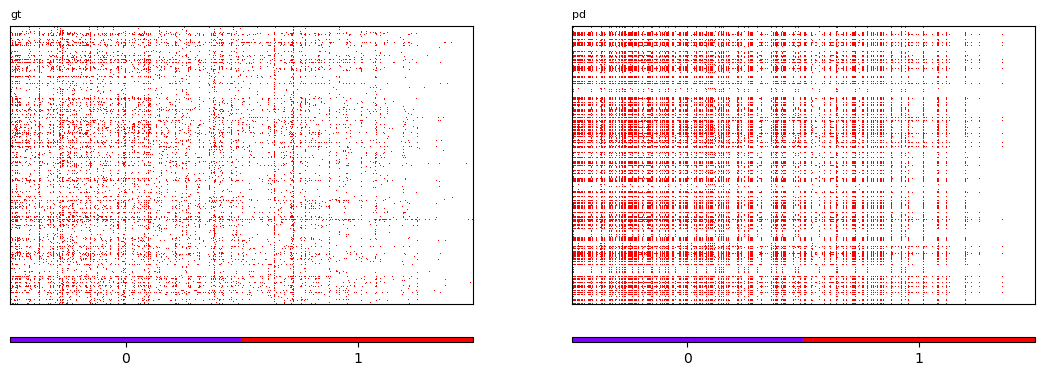

train                                       \
                              0                                        
                time  k   score score_0.5 desc_len       shape    TP   
0  26/07/24 05:33:39  0  2745.8   -1813.0  14627.0  [116, 131]  5785   
1  26/07/24 05:33:41  1  3040.8   -2370.0  15858.0    [67, 50]  6648   
2  26/07/24 05:33:43  2  3185.0   -2632.0  16599.0   [20, 197]  7063   
3  26/07/24 05:33:45  3  3277.2   -2730.0  16956.0   [23, 138]  7282   
4  26/07/24 05:33:47  4  3355.0   -2871.5  17303.0    [34, 30]  7506   

                                                                            \
                                                                             
        TPR     FP       FPR    FN       FNR       ERR       ACC    Recall   
0  0.537939   9411  0.067585  4969  0.462061  0.095867  0.904133  0.537939   
1  0.618189  11388  0.081783  4106  0.381811  0.103293  0.896707  0.618189   
2  0.656779  12327  0.088527  3691  0.343221  0.106787  0.893213  0.656779   
3  0.677143  12742  0.091507  3472  0.322857  0.108093  0.891907  0.677143   
4  0.697973  13249  0.095148  3248  0.302027  0.109980  0.890020  0.697973   

                       
                       
  Precision        F1  
0  0.380692  0.445857  
1  0.368596  0.461827  
2  0.364260  0.468617  
3  0.363664  0.473195  
4  0.361648  0.476435

<Figure size 640x480 with 0 Axes>

In [5]:
from PyBMF.models import Asso

k = 5
tau = 0.15
w_fp = 0.2

model = Asso(k=k, tau=tau, w_fp=w_fp)
model.fit(X_train=X_train, X_val=None, X_test=None, task='reconstruction', verbose=False, display=False, save_model=False)

# Prediction task with `RatioSplit`

In [6]:
# splitting the data into train, validation and test

from PyBMF.datasets import RatioSplit, NoSplit

split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
# split = NoSplit(X=data.X)

split.negative_sample(
    train_size=split.pos_train_size, 
    val_size=split.pos_val_size, 
    test_size=split.pos_test_size, 
    seed=2023, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 7527
[I]   val_size     : 1076
[I]   test_size    : 2151
[I]   seed         : 1997
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 139246
[I]   n_negatives  : 10754
[I]   train_size   : 7527
[I]   val_size     : 1076
[I]   test_size    : 2151
[I]   seed         : 2023


[I] tau          : 0.15
[I] k            : 5
[I] tol          : 0
[I] w_fp         : 0.2
[I] w_fn         : None
[I] verbose      : False
[I] display      : False
[I] save_model   : False
[I] task         : reconstruction
[I]   save_model : False
[I] name         : 2024-07-26 17-33-48-552735 Asso


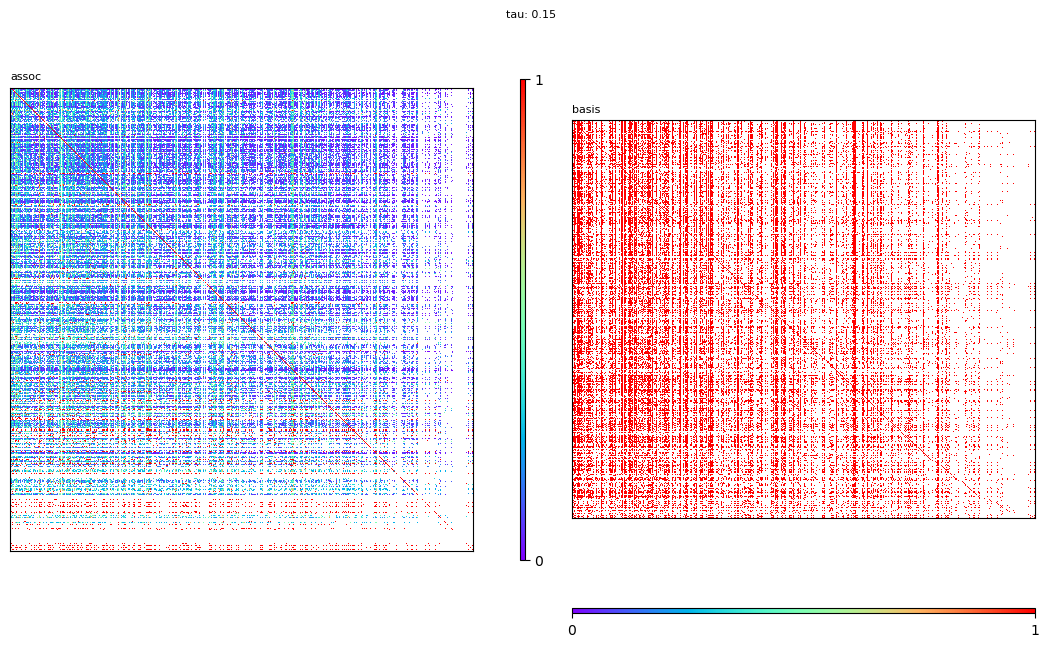

100%|██████████| 5/5 [00:08<00:00,  1.74s/it]                


[W] Stopped in advance: Reach requested factor
[I] time elapsed :  9s


<Figure size 640x480 with 0 Axes>

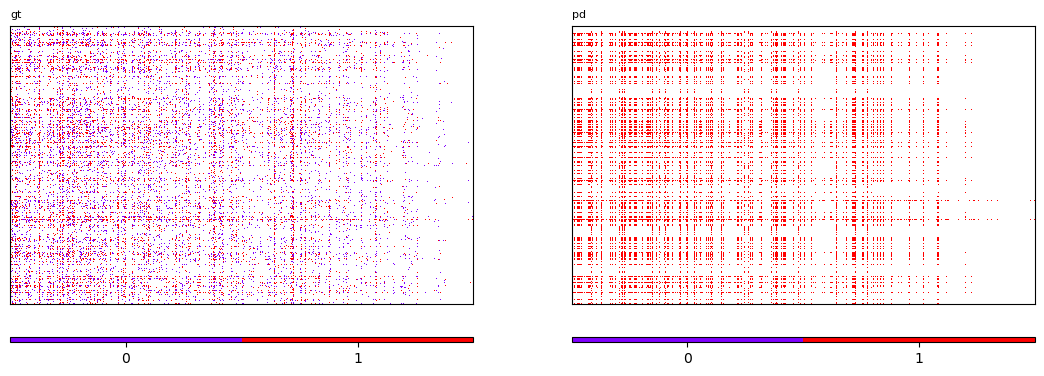

train                                                \
                              0                                                 
                time  k   score score_0.5 desc_len      shape    TP       TPR   
0  26/07/24 05:33:51  0  1219.0   -1541.0  10801.0  [100, 92]  3059  0.406404   
1  26/07/24 05:33:52  1  1422.0   -2046.0  11940.0  [100, 29]  3734  0.496081   
2  26/07/24 05:33:54  2  1572.4   -2270.0  12574.0  [16, 170]  4134  0.549223   
3  26/07/24 05:33:56  3  1638.8   -2413.0  12973.0   [25, 88]  4340  0.576591   
4  26/07/24 05:33:58  4  1698.6   -2416.5  13189.0   [2, 207]  4442  0.590142   

                                                                           \
                                                                            
     FP       FPR    FN       FNR       ERR       ACC    Recall Precision   
0  6141  0.043103  4468  0.593596  0.070727  0.929273  0.406404  0.332500   
1  7826  0.054930  3793  0.503919  0.077460  0.922540  0.496081  0.323010   
2  8674  0.060882  3393  0.450777  0.080447  0.919553  0.549223  0.322767   
3  9166  0.064335  3187  0.423409  0.082353  0.917647  0.576591  0.321339   
4  9275  0.065100  3085  0.409858  0.082400  0.917600  0.590142  0.323832   

             val                                                      \
               0                                                       
         F1   TP       TPR     FP       FPR   FN       FNR       ERR   
0  0.365756  429  0.398699   8771  0.058896  647  0.601301  0.062787   
1  0.391261  499  0.463755  11061  0.074273  577  0.536245  0.077587   
2  0.406590  539  0.500929  12269  0.082384  537  0.499071  0.085373   
3  0.412685  559  0.519517  12947  0.086937  517  0.480483  0.089760   
4  0.418189  565  0.525093  13152  0.088314  511  0.474907  0.091087   

                                           test                             \
                                              0                              
        ACC    Recall Precision        F1    TP       TPR     FP       FPR   
0  0.937213  0.398699  0.046630  0.083496   833  0.387262   8367  0.056592   
1  0.922413  0.463755  0.043166  0.078981   972  0.451883  10588  0.071614   
2  0.914627  0.500929  0.042083  0.077643  1049  0.487680  11759  0.079534   
3  0.910240  0.519517  0.041389  0.076670  1113  0.517434  12393  0.083822   
4  0.908913  0.525093  0.041190  0.076387  1116  0.518828  12601  0.085229   

                                                                     
                                                                     
     FN       FNR       ERR       ACC    Recall Precision        F1  
0  1318  0.612738  0.064567  0.935433  0.387262  0.090543  0.146771  
1  1179  0.548117  0.078447  0.921553  0.451883  0.084083  0.141784  
2  1102  0.512320  0.085740  0.914260  0.487680  0.081902  0.140250  
3  1038  0.482566  0.089540  0.910460  0.517434  0.082408  0.142173  
4  1035  0.481172  0.090907  0.909093  0.518828  0.081359  0.140660

<Figure size 640x480 with 0 Axes>

In [7]:
from PyBMF.models import Asso

k = 5
tau = 0.15
w_fp = 0.2

model = Asso(k=k, tau=tau, w_fp=w_fp)
model.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='reconstruction', verbose=False, display=False, save_model=False)